In [1]:
!pip install vizard

In [2]:
import pandas as pd
import vizard
from tqdm.auto import tqdm
from sklearn.datasets import fetch_20newsgroups

tqdm.pandas()
pd.options.display.max_colwidth = None

In [3]:
data = fetch_20newsgroups(subset='all')

df = pd.DataFrame({
    'Text': data['data'],
    'Target': data['target']
})
df['Target'] = df['Target'].apply(lambda x: data['target_names'][x])
print(df.shape)
df.head()

(18846, 2)


Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n 

In [4]:
class config:
    PROBLEM_TYPE = 'classification'
    DEPENDENT_VARIABLE = 'Target'
    TEXT_VARIABLES = ['Text']

In [5]:
viz = vizard.VizardIn(df, config)

# Missing Value Analysis

In [6]:
viz.check_missing()

In [7]:
viz.count_missing()

# Analysis of values in all Columns

In [8]:
viz.count_unique()

# Target Column Distribution

In [9]:
viz.dependent_variable()

# Segmented Univariate Analysis

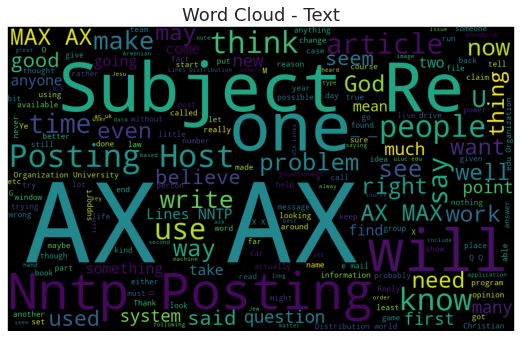

In [10]:
viz.wordcloud();

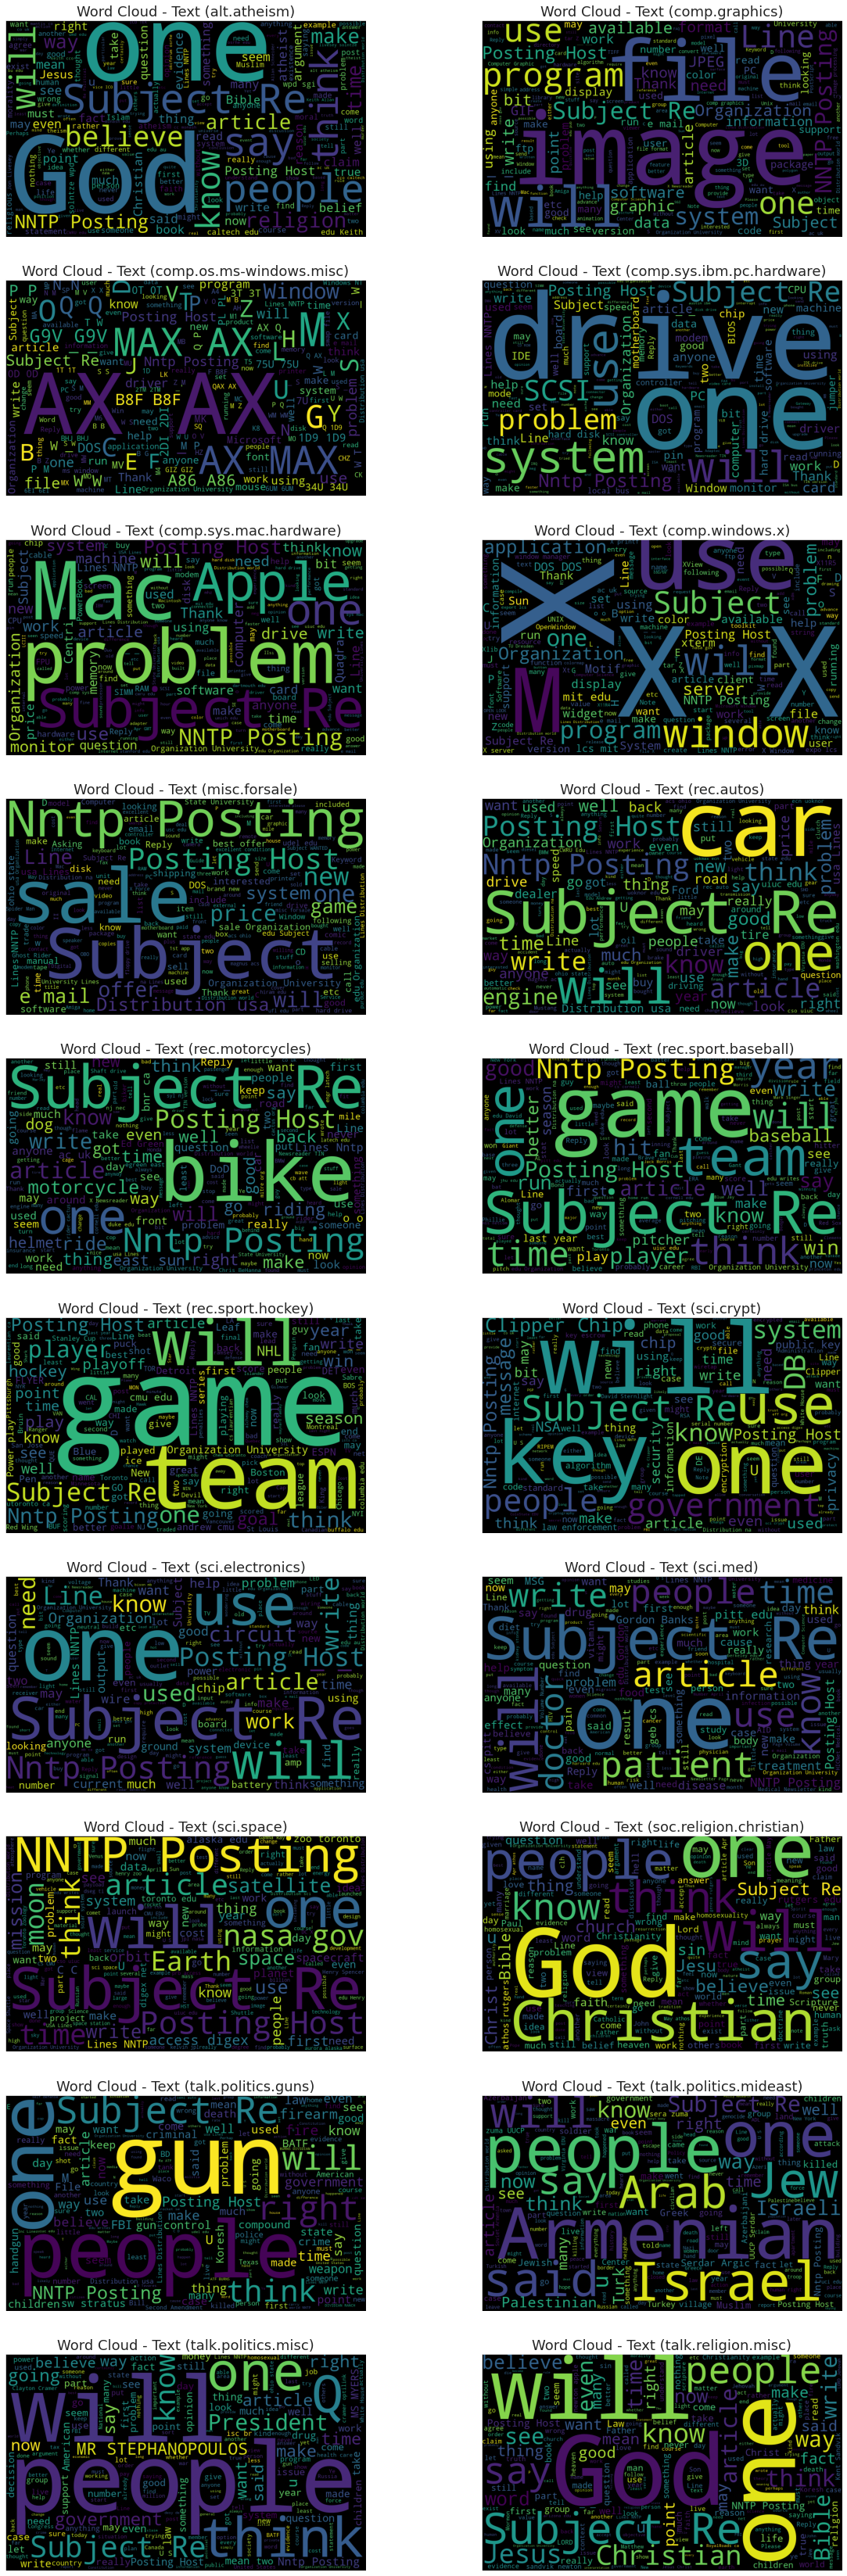

In [11]:
viz.wordcloud_by_group('Target');

In [12]:
import re, spacy

nlp = spacy.load('en', disable=['parser', 'ner'])

def clean_text(x):
    x = str(x).strip().lower()  # Lower case the data
    x = re.sub(r'''((http[s]?://)[^ <>'"{}|\^`[\]]*)''', r' ', x) # remove urls
    x = re.sub(r'[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+', r' ', x) # remove emails
    x = re.sub(r'<style.*>[\s\S]+</style>', ' ', x) # remove css
    x = re.sub(r'<script.*>[\s\S]*</script>', ' ', x) # remove js
    x = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", ' ', x) # remove html


    if len(x) != 0:
        parsed = nlp(x)
        lemmatized = ' '.join([w.lemma_ for w in parsed if not w.is_stop])

        # Remove punct
        punct_removed = re.sub(r"\W", ' ', str(lemmatized))
        punct_removed = re.sub(r'\d', ' ', str(punct_removed))
        punct_removed = re.sub(r'\s+', ' ', str(punct_removed))
    else:
        punct_removed = x
    
    return punct_removed

In [13]:
df['Text'] = df['Text'].progress_apply(clean_text)

viz.data = df

  0%|          | 0/18846 [00:00<?, ?it/s]

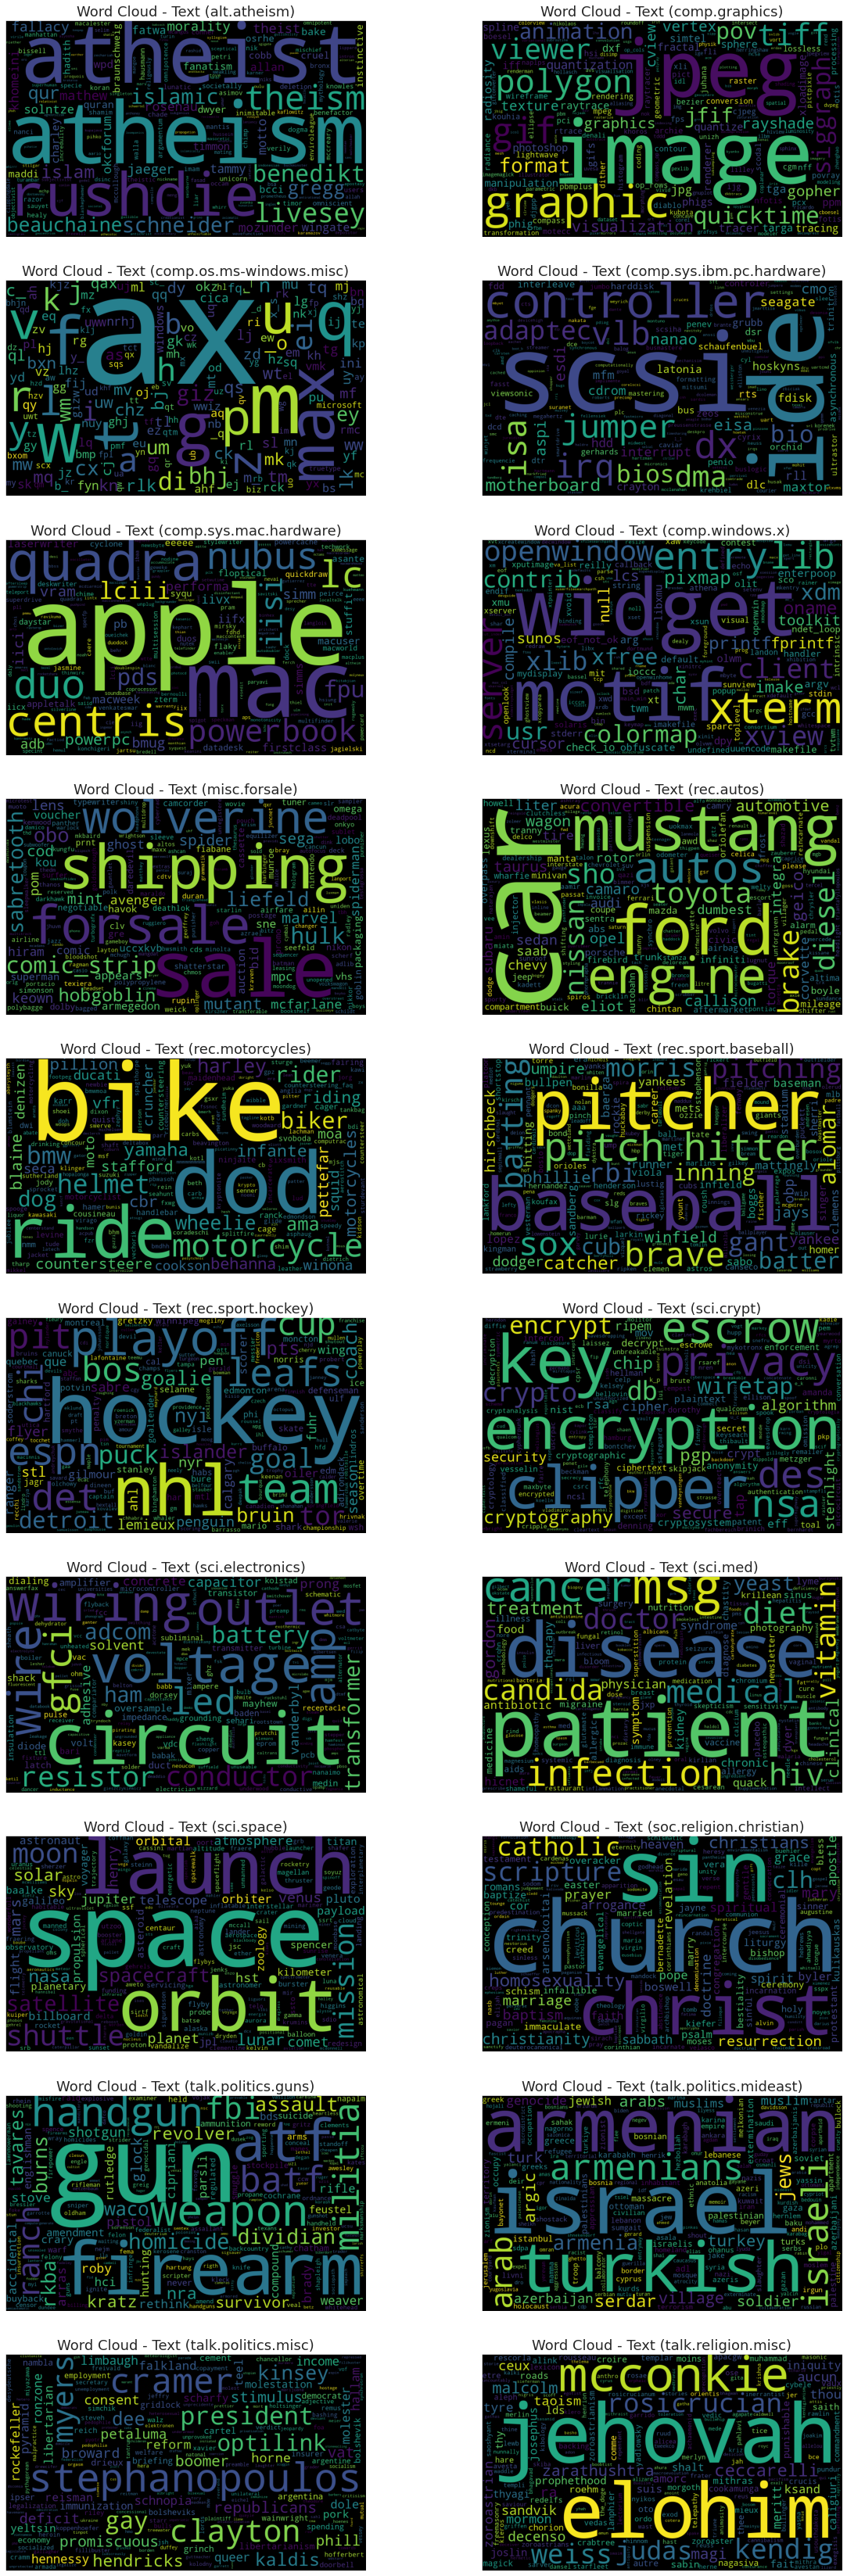

In [14]:
viz.wordcloud_freq('Target');